## 编程思想
1. 高内聚 低耦合 
内聚指的是类成员的相似性，低耦合指模块之间的依赖程度  
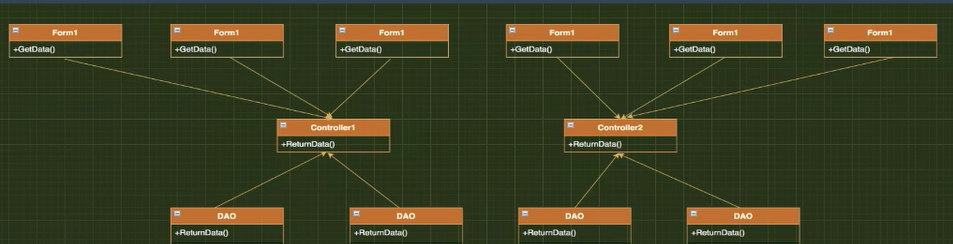

低耦合可以提供更高的扩展性和复用性

### 单一职责原则 (SRP)
应该有且只有一个改变类的原因；一个类只做一件事。
考虑修改类的可能性，方法的变化，内部方法需要改变，要修改类，不符合SRP，要添加新方法，修改类。
要做到只在添加方法时改变这个类，其他修改均不会改变这个类。 会存在类爆炸的现象。
Q: 如何实现，保证这个类有且只有一个改变的原因， 添加功能
A: 将实现写在这个类，无论如何都会改变这个类，解决方法1：将每个方法写成一个类，单独调用每个类的方法；
解决方法2：将每个方法抽象为一个接口，用子类去实现接口，然后在telephone中调用。

In [1]:
class TelPhone
{
    public void Dial(string phone_number){
    Console. WriteLine("给打电话");
    }

    public void HangUp(string phone_number){
    Console. WriteLine("挂断"+ phone_number +"电话");
    }
    public void SendMessage(string message){
        Console.WriteLine("发送"+ message);
    }
    
    public void ReciveMessage(string message){
    Console.WriteLine("接收"+ message);
    }
}

In [12]:
public interface IDial{
    void Dial(string number);
}
public class Nokia : IDial
{
    public void Diao(string number){
        Console. WriteLine("给"+number+"打电话");
    }
}
class TelPhone
{



    private IDial _dial;
    //注入接口
    public TelPhone(IDial dial){
        this._dial = dial;
    }


    //面向抽象编程
    public void Dial(string phone_number){
        _dial.Dial(phone_number);
    }

    public void HangUp(string phone_number){
    Console. WriteLine("挂断"+ phone_number +"电话");
    }
    public void SendMessage(string message){
        Console.WriteLine("发送"+ message);
    }
    
    public void ReciveMessage(string message){
    Console.WriteLine("接收"+ message);
    }
}

Error: (4,22): error CS0535: 'Nokia' does not implement interface member 'IDial.Dial(string)'

### 开放封闭原则 （OCP）
对扩展开放，对修改封闭。
需求改变时不进行源代码的修改，而通过扩展使其满足新的需求。
面向抽象编程，使用抽象来封装变化。核心即是封装变化。

Q: 使用代码，描述不同需求的用户去银行办理不同业务
1. 在这段程序中，会出现对少个对象？
2. 每个对象的属性和行为？
   
A: 对象1 用户 需要一个属性记录用户的类型
   对象2 银行柜员 去处理业务需求 
   对象3 银行业务系统 处理取钱 存钱 转账的操作系统  

将每个方法进行接口的抽象不太实际，根据实际的业务情况，减少接口的抽象。进行高度抽象封装。抽象的提升。
封装变化，变化可以是consume Api.也可以是Expose Api(Return result)，返回一个接口。

In [13]:
public interface IBankProcess{
    void Process();
}

public interface IBankClient{
    IBankProcess GetBankProcess();
}

### 依赖倒置原则 DIP 
开放封闭原则是面向对象设计的目标，依赖倒置是实现开放封闭的基础。
1. 高层模块（调用者）不应该依赖于低层模块（provider），两个都应该依赖于抽象。
2. 抽象（抽象类，接口）不应该依赖于细节，细节（实现）应该依赖于抽象。
3. 本质是通过抽象使各个类或模块的实现彼此独立，实现模块之间的松耦合。
> 关于依赖
> 1 、一个优秀的面向对象程序设计，核心的原则之一就是将变化「隔离」/ 封装」，使得变化部分发生变化时，其他部分，不受影响。
> 2.为了实现这个目的，需要使用面向接囗编程，使用后，客户类，不再直接依賴服务类，而是依赖一个抽象的接口，这样，客户类就不能在内部直接实例化服务类。
> 3 、但是客户类在运行的过程中，又需具体的服务类来提供服务，因为接口是不能实例化的，就产生了一个矛盾：客户类不允许实例化服务类，但是客户类又需要服务类的服务“h 、为了解决这个矛盾，我们设计了一种解决方案，既：客户类定义一个注入点，用于服务类的注入，而客户类的客户类（Program类或者服务容器）负责根据情况，实例化服务类，注入到客户类中，从而解决了这个矛盾。

这个方案对那些需要被Button控制的对象提出了一个约束。需要被Button控制的对象必须要实现ISwitchableDevice接口。
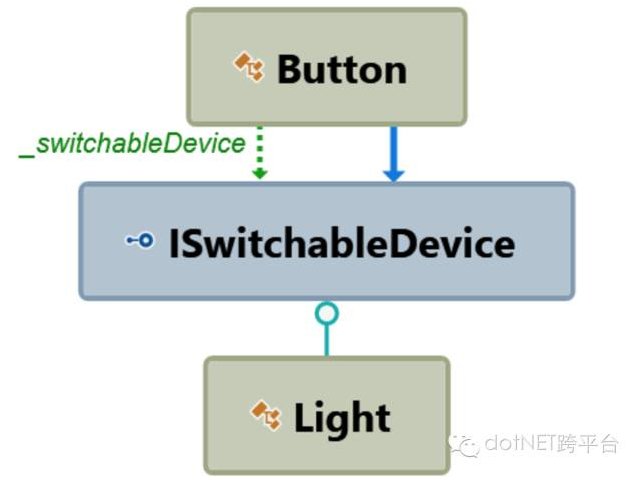

#### 依赖关系如何传递？
1. 通过接口注入
2. 通过构造函数注入
3. 通过属性注入，但会影响类的封装，不推荐使用。

### 里式替换原则（LSP）
1. 如果S是T的子类，则T类型的对象可以替换为S类型的对象。
2. 所有引用父类对象的地方，都可以使用其子类型进行代替。
3. 子类可以替代父类。
##### 违反LSP的例子
子类违反父类声明要实现的功能
子类违反父类对输入、输出和异常约定
子类违反父类注释中罗列的任何特殊说明

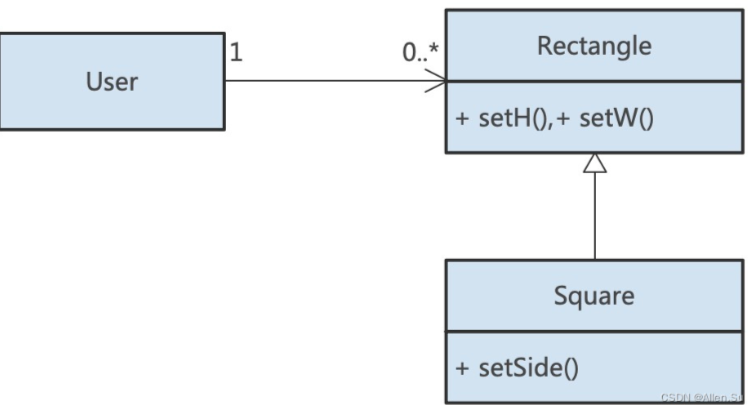

这个案例中，Square类并不是Rectangle类的子类型，因为Rectangle类的高和宽可以分别修改，而Square类的高和宽则必须一同修改。由于User类始终认为自己在操作Rectangle类，因此会带来一些混淆。例如在下面的代码中：

In [14]:
class Rectangle{
    public void setW(int value){}
    public void setH(int value){}
    public int area(){}
}
Rectangle r = ...
r.setW(5);
r.setH(2);
assert(r.area() == 10);
//很显然，如果上述代码在…处返回的是Square类，则最后assert是不会成立的。

Error: (4,15): error CS8635: Unexpected character sequence '...'
(4,17): error CS1003: Syntax error, ',' expected
(4,18): error CS1002: ; expected

### 接口隔离原则 ISP 
1. 客户端不应该依赖它不需要的接口。
2. 一个类对另一个类的依赖应该建立在最小接口上。
3. 接口尽量细分，不要在一个接口中放很多方法。

In [21]:
class PrintArray{

    //客户端不应该依赖它不需要的接口
    public void Print1<T>(IEnumerable<T> array){

   
        var itr = array.GetEnumerator();
        while(itr.MoveNext()){
            Console.WriteLine(itr.Current);
        }
    }

    public void Print2<T>(ICollection<T> array){

        //不需要的方法
        var s  = array.Count;
        array.CopyTo(null,0);
        var itr = array.GetEnumerator();
        while(itr.MoveNext()){
            Console.WriteLine(itr.Current);
        }
    }
}

//Print1方法的接受对象有更大的范围，只要实现IEnumberable接口即可。

### 迪米特原则 The Least Knowledge of Class
1. 要求一个对象应该对其他对象有最少的了解
2. 降低类之间的耦合
3. 迪米特法则实际上是一个类在创建方法和属性时要遵守的法则

类只暴露给外部应该暴露的方法和属性，封装。
> 只和直接朋友通信！
> 1.成员对象
> 2.方法参数
> 3.方法返回值
> 4.出现在局部变量中的类不是直接朋友 TestC 与TestA类不是直接朋友，

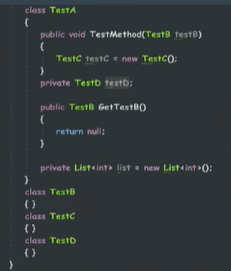


### 合成复用原则
1. 尽量使用对象组合，而不是继承来达到复用。

#### 类的依赖关系
1. 泛化，Generic Animal 是Tiger的泛化， Tiger是Animal的特化。
2. 实现 类与接口的关系 表示类实现了接口  虚线空心三角
3. 组合 是整体和部分的关系 部分没有独立的生命周期，是一个强拥有的关系 实心菱形符号
4. 聚合 个体有独立的生命周期 弱拥有 空心菱形符号
5. 关联 使一个类知道另一个类的方法和属性 1：N N:N 
6. 依赖 虚线箭头

### 设计模式
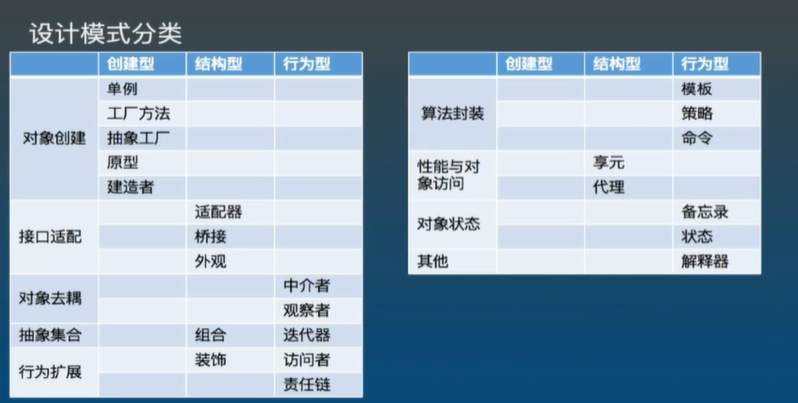

#### 单例模式
要求生产唯一序列号。
WEB 中的计数器，不用每次刷新都在数据库里加一次，用单例先缓存起来。
创建的一个对象需要消耗的资源过多，比如 I/O 与数据库的连接等。

1. Database Connections: When you have a single database connection that should be shared across various parts of your application to avoid the overhead of creating multiple connections.

2. Logging: In a multi-threaded environment, a singleton logger can ensure that log entries from different parts of the application are properly synchronized and written to a single log file.

3. Caching: If you want to maintain a single cache instance for frequently used data to improve performance and avoid redundant cache initialization.

4. Hardware Management: When managing access to hardware resources like a printer, you may want to ensure that only one instance of the resource manager exists to prevent conflicts.

5. Configuration Management: For managing application-wide configuration settings, a singleton can provide a single point of access and avoid duplication.

6. Thread Pools: When implementing a thread pool, you might want to have a single pool manager that controls the creation and distribution of threads.

7. GUI Components: In graphical applications, you might use a Singleton pattern to manage a single instance of a user interface component such as a window manager or clipboard manager.

8. Application State: In some cases, you might want to maintain a single instance to represent the state of the application.

In [ ]:

//eager 
public class Singleton
{
    // Private static instance created eagerly
    private static Singleton instance = new Singleton();

    // Private constructor to prevent instantiation
    private Singleton() { }

    // Public method to access the instance
    public static Singleton Instance
    {
        get { return instance; }
    }
}




In [22]:
//lazy-initialization
public class Singleton
{
    // Private static instance created lazily
    private static readonly Lazy<Singleton> lazyInstance = new Lazy<Singleton>(() => new Singleton());

    // Private constructor to prevent instantiation
    private Singleton() { }

    // Public method to access the instance
    public static Singleton Instance
    {
        get { return lazyInstance.Value; }
    }
}


#### 工厂方法
1. Creating Objects with Common Interfaces: When you need to create objects that share a common interface or base class, but the actual concrete class to instantiate depends on the specific use case or configuration.

2. Plug-in Architecture: In applications that support plug-ins or extensions, the Factory Method can be used to allow external modules to define and create their own instances of objects without modifying the core code.

3. Library/Framework Extensions: When developing a library or framework, the Factory Method pattern allows client code to extend or customize behavior by providing their own factory implementations.

4. Database Connection: In database access libraries, you may want to abstract away the details of creating database connections and provide a factory method for clients to obtain connections without exposing the intricacies of the database connection logic.

5. Resource Allocation: If you need to manage limited resources (e.g., thread pools, database connections, memory pools), a Factory Method can help control the allocation and release of these resources.

6. Dependency Injection: When applying the Dependency Injection principle, you can use factory methods to create instances of dependent objects and inject them into other objects. BeanFactory

7. Conditional Object Creation: If you need to create objects based on runtime conditions or configurations, a Factory Method can encapsulate the logic for making these decisions.

8. Testing: In unit testing, you can use Factory Methods to create mock or stub objects to replace real dependencies, making it easier to isolate and test specific parts of your code.

In [ ]:

//工厂方法的基本实现
// The Creator (abstract class)
public abstract class DocumentCreator
{
    // Factory Method
    public abstract Document CreateDocument();
}

// Concrete Creator
public class PdfDocumentCreator : DocumentCreator
{
    public override Document CreateDocument()
    {
        return new PdfDocument();
    }
}

public class WordDocumentCreator : DocumentCreator
{
    public override Document CreateDocument()
    {
        return new WordDocument();
    }
}

// The Product (abstract class)
public abstract class Document
{
    public abstract void Open();
    public abstract void Save();
}

// Concrete Products
public class PdfDocument : Document
{
    public override void Open() { /* Open PDF logic */ }
    public override void Save() { /* Save PDF logic */ }
}

public class WordDocument : Document
{
    public override void Open() { /* Open Word doc logic */ }
    public override void Save() { /* Save Word doc logic */ }
}


In [24]:
// resource allocation
//Identify the Resource: Determine the type of resource you want to allocate. This could be things like database connections, threads, memory pools, or any other finite resource.

//Create a Resource Interface or Base Class:
//Define an interface or base class that represents the resource. This interface or base class should include methods for acquiring and releasing the resource.

public interface IResource
{
    void Acquire();
    void Release();
}


//Create a Concrete resource Class
public class DatabaseConnection : IResource
{
    public void Acquire()
    {
        // Logic to acquire a database connection
    }

    public void Release()
    {
        // Logic to release the database connection
    }
}


//Create a resource Factory interface or base Class
public interface IResourceFactory
{
    IResource CreateResource();
}

//Concrete resource Factory for resource
public class DatabaseConnectionFactory : IResourceFactory
{
    public IResource CreateResource()
    {
        return new DatabaseConnection();
    }
}


//use the Factory to allocate resource 
IResourceFactory factory = new DatabaseConnectionFactory();
IResource resource = factory.CreateResource();

try
{
    resource.Acquire();
    // Use the resource
}
finally
{
    resource.Release();
}


> Extend for Different Resource Types:
> If you have multiple types of resources (e.g., database connections, file handles), you can create additional resource classes and corresponding factory classes, following the same pattern.

The Factory Method pattern helps encapsulate the resource allocation and release logic within the factory classes, making it easier to manage resources throughout your application. It also provides a clear separation between resource management and the rest of your application logic, improving code maintainability and reusability.



#### 建造者设计模式
1. Complex Object Construction: When an object has a large number of properties, some of which may have default values or be optional, and you want to simplify the process of creating instances of this object.
2. Immutable Objects: When you want to create immutable objects, meaning that once they are constructed, their state cannot be modified. Builders can help in constructing such objects incrementally and then producing an immutable instance.
3. Fluent Interface: When you want to provide a readable, expressive, and fluent interface for configuring and constructing objects. This is often seen in method chaining, where you can call methods successively to set properties or parameters.
4. Parameter Sets: When you have multiple ways to configure or initialize an object with various combinations of parameters. The Builder pattern allows you to provide different methods for setting these parameters, making it clear and flexible for clients.
5. Variability of Object Representation: When you want to create different representations of the same object, such as HTML, XML, or JSON builders for a document object. Builders can handle the creation of these different representations.
6. Test Data Generation: When generating test data for unit tests or when creating mock objects for testing, the Builder pattern can be used to construct complex test objects with ease.
7. Avoiding Telescoping Constructors: When the class has multiple constructors with different parameter sets, and using all of them becomes cumbersome and error-prone. The Builder pattern simplifies this by providing a single point of control for object construction.
8. Separating Construction Logic: When you want to separate the construction logic of an object from its class, improving maintainability and reducing code duplication.
9. Configurable Object Creation: When you want to create objects with various configurations or profiles, such as user accounts with different permission levels or product configurations with varying features.
10. Combining Components: When you have a complex object that can be composed of multiple components or parts, and you want to construct the object by assembling these parts.

In [ ]:
public class Product {
    private String name;
    private int size;
    private double price;

    private Product(ProductBuilder builder) {
        this.name = builder.name;
        this.size = builder.size;
        this.price = builder.price;
    }

    public static class ProductBuilder {
        private String name;
        private int size;
        private double price;

        public ProductBuilder(String name) {
            this.name = name;
        }

        public ProductBuilder size(int size) {
            this.size = size;
            return this;
        }

        public ProductBuilder price(double price) {
            this.price = price;
            return this;
        }

        public Product build() {
            return new Product(this);
        }
    }
}

// Usage:
Product product = new Product.ProductBuilder("Widget")
                    .size(10)
                    .price(29.99)
                    .build();


完成复杂对象的构建


In [ ]:
using System;

public class ComplexObject
{
    public int Property1 { get; set; }
    public string Property2 { get; set; }
    public double Property3 { get; set; }
    // ... other properties

    private ComplexObject()
    {
        // Private constructor to prevent direct instantiation
    }

    public class Builder
    {
        private ComplexObject complexObject = new ComplexObject();

        public Builder SetProperty1(int value)
        {
            complexObject.Property1 = value;
            return this;
        }

        public Builder SetProperty2(string value)
        {
            complexObject.Property2 = value;
            return this;
        }

        public Builder SetProperty3(double value)
        {
            complexObject.Property3 = value;
            return this;
        }

        // ... other setter methods for properties

        public ComplexObject Build()
        {
            return complexObject;
        }
    }
}

class Program
{
    static void Main()
    {
        ComplexObject complexObject = new ComplexObject.Builder()
            .SetProperty1(42)
            .SetProperty2("Sample")
            .SetProperty3(3.14)
            .Build();

        Console.WriteLine($"Property1: {complexObject.Property1}");
        Console.WriteLine($"Property2: {complexObject.Property2}");
        Console.WriteLine($"Property3: {complexObject.Property3}");

        // ... access other properties as needed
    }
}


#### 适配器模式
1. Integrating with Legacy Code: When you need to integrate new code with existing code that has a different interface. Instead of modifying the existing code, you can create an adapter to make them work together.
2. Third-party Libraries: When you want to use a third-party library or component that has an interface incompatible with your system's interface. You can create an adapter to make the third-party component work seamlessly with your code.
3. Standardizing Interfaces: In cases where you have multiple classes or systems with similar functionalities but different interfaces, you can create adapters to standardize the interfaces and simplify interactions.
4. Maintaining Separation of Concerns: When you want to keep different parts of your codebase loosely coupled. Adapters can act as intermediaries that allow you to change one part of the code without affecting the other.
5. Testing: Adapters can also be useful in testing, where you may need to create mock objects or simulate behaviors of certain components that your code depends on.

In [ ]:
interface NewSystemInterface {
    void newOperation();
}

class OldSystem {
    void legacyOperation() {
        // ...
    }
}

class Adapter implements NewSystemInterface {
    private OldSystem oldSystem;

    public Adapter(OldSystem oldSystem) {
        this.oldSystem = oldSystem;
    }

    @Override
    public void newOperation() {
        oldSystem.legacyOperation();
    }
}


In [25]:
// Define the Service interface.
public interface IService
{
    void Operation();
}

// Existing Service class.
public class Service : IService
{
    public void Operation()
    {
        Console.WriteLine("Service is performing the operation.");
    }
}

// New BetterService class with a different interface.
public class BetterService
{
    public void BetterOperation()
    {
        Console.WriteLine("BetterService is performing the better operation.");
    }
}

// Adapter for BetterService to implement the IService interface.
public class BetterServiceAdapter : IService
{
    private BetterService betterService;

    public BetterServiceAdapter(BetterService service)
    {
        this.betterService = service;
    }

    public void Operation()
    {
        // Adapt the BetterService method to match the IService interface.
        betterService.BetterOperation();
    }
}

// Client class that uses IService.
public class Client
{
    private IService service;

    public Client(IService service)
    {
        this.service = service;
    }

    public void UseService()
    {
        service.Operation();
    }
}

class Program
{
    static void Main()
    {
        // Existing client code uses the Service class.
        var client = new Client(new Service());
        client.UseService();

        // Introduce the BetterService without modifying the Client code using the adapter.
        var betterService = new BetterServiceAdapter(new BetterService());
        client = new Client(betterService);
        client.UseService();
    }
}


#### 桥接模式 分离抽象与实现
1. When you need to avoid a permanent binding between an abstraction and its implementation: The Bridge pattern allows you to decouple the abstraction (e.g., an interface or an abstract class) from its concrete implementations. This is useful when you want to switch or extend implementations dynamically at runtime without affecting the client code.
2. When you have multiple hierarchies: If you have two or more class hierarchies that are orthogonal (meaning they don't depend on each other), the Bridge pattern can help manage their interaction by providing a separate hierarchy for each, one for the abstraction and one for the implementation.
3. When you want to share an implementation among multiple objects: With the Bridge pattern, multiple abstractions can share the same implementation class. This promotes code reusability and reduces redundancy.
4. when you want to extend classes in multiple dimensions: If you need to extend classes in different ways without creating a combinatorial explosion of subclasses, the Bridge pattern can be a more flexible alternative to using inheritance.
5. When you need to work with platform-specific code: In software development, you may need to work with platform-specific code, such as when creating cross-platform applications. The Bridge pattern can help isolate platform-specific code in separate implementations, making it easier to manage and maintain.

In [32]:
// Implementor: EntertainmentDevice
public interface IEntertainmentDevice
{
    void TurnOn();
    void TurnOff();
    void SetVolume(int volume);
}

// Concrete Implementor 1: TV
public class TV : IEntertainmentDevice
{
    public void TurnOn()
    {
        Console.WriteLine("TV is ON");
    }

    public void TurnOff()
    {
        Console.WriteLine("TV is OFF");
    }

    public void SetVolume(int volume)
    {
        Console.WriteLine($"TV Volume set to {volume}");
    }
}

// Concrete Implementor 2: Radio
public class Radio : IEntertainmentDevice
{
    public void TurnOn()
    {
        Console.WriteLine("Radio is ON");
    }

    public void TurnOff()
    {
        Console.WriteLine("Radio is OFF");
    }

    public void SetVolume(int volume)
    {
        Console.WriteLine($"Radio Volume set to {volume}");
    }
}

// Abstraction: RemoteControl
public abstract class RemoteControl
{
    protected IEntertainmentDevice device;

    public RemoteControl(IEntertainmentDevice device)
    {
        this.device = device;
    }

    public abstract void PowerOn();
    public abstract void PowerOff();
    public abstract void AdjustVolume(int volume);
}

// Refined Abstraction 1: BasicRemoteControl
public class BasicRemoteControl : RemoteControl
{
    public BasicRemoteControl(IEntertainmentDevice device) : base(device) { }

    public override void PowerOn()
    {
        device.TurnOn();
    }

    public override void PowerOff()
    {
        device.TurnOff();
    }

    public override void AdjustVolume(int volume)
    {
        device.SetVolume(volume);
    }
}

// Refined Abstraction 2: AdvancedRemoteControl
public class AdvancedRemoteControl : RemoteControl
{
    public AdvancedRemoteControl(IEntertainmentDevice device) : base(device) { }

    public override void PowerOn()
    {
        device.TurnOn();
    }

    public override void PowerOff()
    {
        device.TurnOff();
    }


    public override void AdjustVolume(int volume)
    {
        device.SetVolume(volume);
    }
    public void Mute()
    {
        device.SetVolume(0);
    }
}

class Program
{
    static void Main()
    {
        // Create entertainment devices (implementors)
        IEntertainmentDevice tv = new TV();
        IEntertainmentDevice radio = new Radio();

        // Create remote controls (abstractions)
        RemoteControl basicRemote = new BasicRemoteControl(tv);
        RemoteControl advancedRemote = new AdvancedRemoteControl(radio);

        // Use the remote controls
        basicRemote.PowerOn();
        basicRemote.AdjustVolume(20);
        basicRemote.PowerOff();

        advancedRemote.PowerOn();
        advancedRemote.Mute();
        advancedRemote.PowerOff();
    }
}


Error: (127,24): error CS1061: 'RemoteControl' does not contain a definition for 'Mute' and no accessible extension method 'Mute' accepting a first argument of type 'RemoteControl' could be found (are you missing a using directive or an assembly reference?)